In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/dataset.csv')

In [3]:
df.head(2)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

# Enhance Data n Cleansing n Manipulation

## Cek duplikasi data

In [5]:
duplicate_value = df.duplicated()

print(f'Total data : {len(df)}')
print(f'Total duplikasi : {duplicate_value.sum()}')

Total data : 9709
Total duplikasi : 0


In [6]:
df.isnull().sum()

,0
ID,0
Gender,0
Own_car,0
Own_property,0
Work_phone,0
Phone,0
Email,0
Unemployed,0
Num_children,0
Num_family,0


**no outliers**

## Drop Column
- Kolom yang memiliki banyak unique value akan di drop
- Dalam pengenalan dataset ini saya lakukan penambahan kolom dan penghapusan kolom dengan alasan tertentu

In [7]:
df.drop(columns=['ID'], axis=1, inplace=True)
df.head(2)

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0


In [8]:
df['Property']=df['Own_car']+df['Own_property']
df.drop(['Own_car', 'Own_property'], axis=1, inplace=True)
df.head(2)

,Gender,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target,Property
0,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1,2
1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0,2


In [9]:
df['Num_phone']=df['Work_phone']+df['Phone']
df.drop(['Work_phone', 'Phone'], axis=1, inplace=True)
df.head(2)

,Gender,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target,Property,Num_phone
0,1,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1,2,1
1,1,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0,2,0


In [10]:
cat_col= df.select_dtypes('object').columns.tolist()
df[cat_col].nunique()

,0
Income_type,5
Education_type,5
Family_status,5
Housing_type,6
Occupation_type,19


In [11]:
for col in df:
  print("---" * 20)
  print("Kolom {col}: ")
  print("Jumlah nilai unik:", df[col].nunique())
  print("Daftar nilai unik:")
  print(df[col].value_counts())
  print("\n")

------------------------------------------------------------
Kolom {col}: 
Jumlah nilai unik: 2
Daftar nilai unik:
Gender
0    6323
1    3386
Name: count, dtype: int64


------------------------------------------------------------
Kolom {col}: 
Jumlah nilai unik: 2
Daftar nilai unik:
Email
0    8859
1     850
Name: count, dtype: int64


------------------------------------------------------------
Kolom {col}: 
Jumlah nilai unik: 2
Daftar nilai unik:
Unemployed
0    8013
1    1696
Name: count, dtype: int64


------------------------------------------------------------
Kolom {col}: 
Jumlah nilai unik: 9
Daftar nilai unik:
Num_children
0     6819
1     1886
2      852
3      126
4       18
5        5
14       1
19       1
7        1
Name: count, dtype: int64


------------------------------------------------------------
Kolom {col}: 
Jumlah nilai unik: 10
Daftar nilai unik:
Num_family
2     5183
1     1947
3     1635
4      802
5      117
6       18
7        4
15       1
20       1
9     

In [12]:
#df.query('Num_children == 0 and Num_family == 2').shape #4880
#df.query('Num_children == 1  and Num_family == 3').shape #1577
#df.query('Num_children == 19  and Num_family == 20').shape #ada
#df.query('Num_children == 2  and Num_family == 5').shape
df.query('Num_children == 4 and Num_family == 5').shape
#Kesimpulannya anaknya ikut ke family
df.drop(columns=['Num_children'], axis=1, inplace=True)
df.head(2)

,Gender,Email,Unemployed,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target,Property,Num_phone
0,1,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1,2,1
1,1,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0,2,0


In [13]:
cat_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(include='number').columns
cat_col

Index(['Income_type', 'Education_type', 'Family_status', 'Housing_type',
       'Occupation_type'],
      dtype='object')

In [14]:
#saran si years iso dikategorikal tpi

# Cek Outliers

In [15]:
out_col=["Num_family","Account_length","Total_income","Age","Years_employed"]

,0
Num_family,"Axes(0.125,0.653529;0.168478x0.226471)"
Account_length,"Axes(0.327174,0.653529;0.168478x0.226471)"
Total_income,"Axes(0.529348,0.653529;0.168478x0.226471)"
Age,"Axes(0.731522,0.653529;0.168478x0.226471)"
Years_employed,"Axes(0.125,0.381765;0.168478x0.226471)"


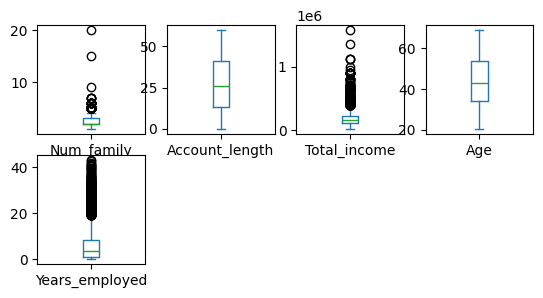

In [16]:
df[out_col].plot(kind="box", subplots=True, layout=(3,4))

In [17]:
for col in out_col:
  print("---" * 20)
  print("Informasi untuk kolom {col}: ")
  print("Jumlah nilai unik:", df[col].nunique())
  print("Daftar nilai unik:")
  print(df[col].value_counts())
  print("\n")

------------------------------------------------------------
Informasi untuk kolom {col}: 
Jumlah nilai unik: 10
Daftar nilai unik:
Num_family
2     5183
1     1947
3     1635
4      802
5      117
6       18
7        4
15       1
20       1
9        1
Name: count, dtype: int64


------------------------------------------------------------
Informasi untuk kolom {col}: 
Jumlah nilai unik: 61
Daftar nilai unik:
Account_length
11    219
13    216
7     215
16    212
5     211
     ... 
55    101
60    100
59     98
57     90
0      57
Name: count, Length: 61, dtype: int64


------------------------------------------------------------
Informasi untuk kolom {col}: 
Jumlah nilai unik: 263
Daftar nilai unik:
Total_income
135000.0    1139
180000.0     845
112500.0     843
157500.0     829
225000.0     750
            ... 
62100.0        1
494100.0       1
249750.0       1
150750.0       1
116100.0       1
Name: count, Length: 263, dtype: int64


------------------------------------------------

### Winsorizing
- semua kolom out col

In [18]:
def winsorize(df, col):

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR

  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

  return df

In [19]:
out_col = ["Num_family","Total_income","Years_employed"]
for col in out_col:
  df = winsorize(df, col)

,0
Num_family,"Axes(0.125,0.653529;0.168478x0.226471)"
Total_income,"Axes(0.327174,0.653529;0.168478x0.226471)"
Years_employed,"Axes(0.529348,0.653529;0.168478x0.226471)"


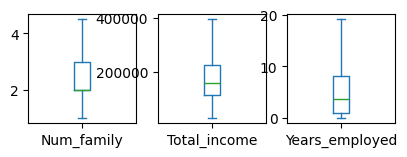

In [20]:
df[out_col].plot(kind="box", subplots=True, layout=(3,4))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9709 non-null   int64  
 1   Email            9709 non-null   int64  
 2   Unemployed       9709 non-null   int64  
 3   Num_family       9709 non-null   float64
 4   Account_length   9709 non-null   int64  
 5   Total_income     9709 non-null   float64
 6   Age              9709 non-null   float64
 7   Years_employed   9709 non-null   float64
 8   Income_type      9709 non-null   object 
 9   Education_type   9709 non-null   object 
 10  Family_status    9709 non-null   object 
 11  Housing_type     9709 non-null   object 
 12  Occupation_type  9709 non-null   object 
 13  Target           9709 non-null   int64  
 14  Property         9709 non-null   int64  
 15  Num_phone        9709 non-null   int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 1.2+ MB


**Amannnnn, beres!**

# Distribusi for check normalization

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Email'}>,
        <Axes: title={'center': 'Unemployed'}>],
       [<Axes: title={'center': 'Num_family'}>,
        <Axes: title={'center': 'Account_length'}>,
        <Axes: title={'center': 'Total_income'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years_employed'}>,
        <Axes: title={'center': 'Target'}>],
       [<Axes: title={'center': 'Property'}>,
        <Axes: title={'center': 'Num_phone'}>, <Axes: >]], dtype=object)

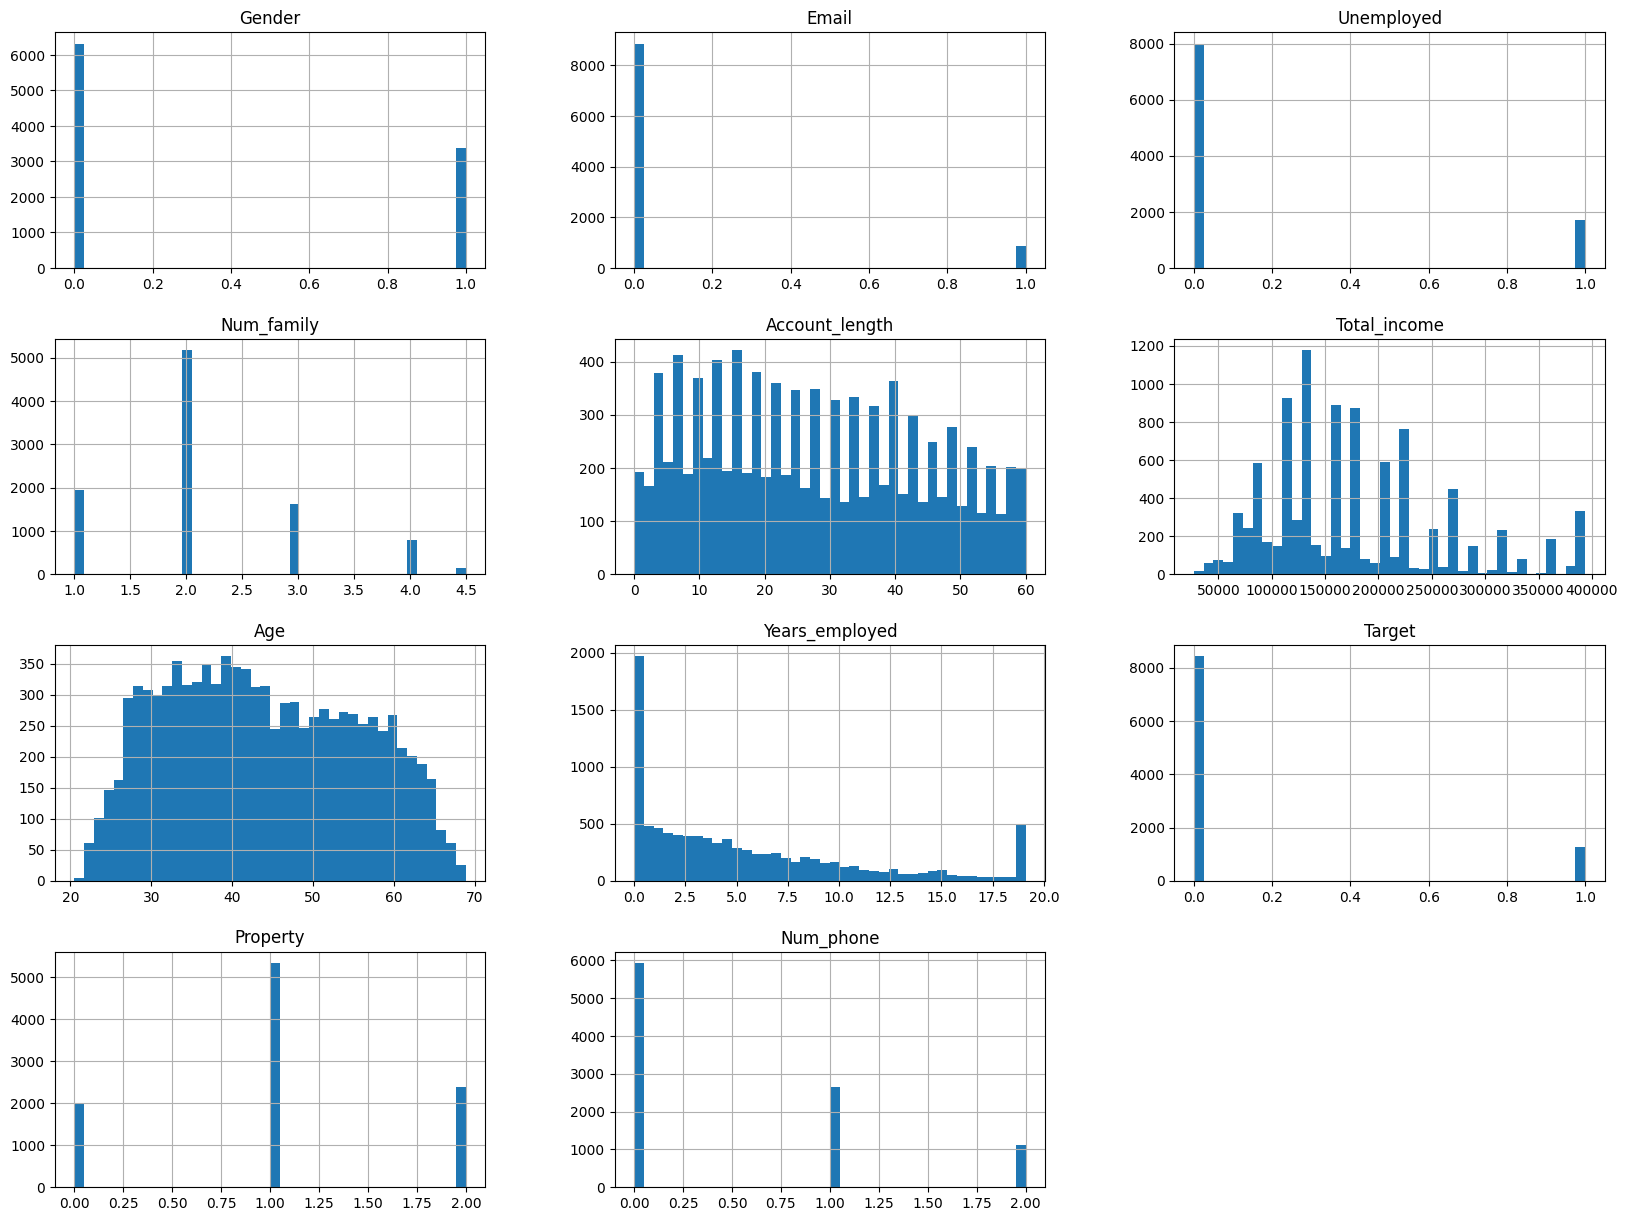

In [22]:
df.hist(bins=40, figsize=(20,15))

- Num_family: Terdapat beberapa nilai yang sangat tinggi (outlier) dibandingkan nilai lainnya.
- Account_length: Distribusi terlihat relatif normal, meskipun ada beberapa nilai ekstrem.
- Total_income: Terlihat ada beberapa nilai yang sangat tinggi, menunjukkan adanya outlier.
- Age: Distribusi terlihat cukup normal tanpa outlier yang signifikan.
- Years_employed: Distribusi menunjukkan banyak nilai yang sangat kecil dan beberapa nilai yang tinggi (outlier).

### Normalisasi Data
- memakai scaler saja agar tidak merubah dsitribusi data terlalu banyak
- sehingga tidak mengubah banyak makna data
- kita gunakan 2 metode dengan berbeda kondisi data

- StandardScaler: Digunakan saat data mengikuti distribusi normal.
- MinMaxScaler: Digunakan saat data perlu dipetakan ke dalam range tertentu.
- RobustScaler: Digunakan saat data memiliki outlier yang signifikan.
- MaxAbsScaler: Digunakan saat data harus dipetakan ke dalam range [-1, 1].
- Normalizer: Digunakan untuk mengubah data ke dalam skala yang sama berdasarkan panjang vektor.

**Kolom yang memiliki outlier kita gunakan robust scaler, yang tidak dengan standard scaler**

In [23]:
#from sklearn.preprocessing import StandardScaler, RobustScaler
# RobustScaler is less prone to outliers.
#std_scaler = StandardScaler()
#rob_scaler = RobustScaler()
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

data_to_scale = df[['Num_family', 'Total_income', 'Years_employed']]
scaled_data = scaler.fit_transform(data_to_scale)
#di df kan
df[['Num_family', 'Total_income', 'Years_employed']] = scaled_data

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_to_scale = df[['Account_length', 'Age']]
scaled_data = scaler.fit_transform(data_to_scale)
#di df kan
df[['Account_length', 'Age']] = scaled_data

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Email'}>,
        <Axes: title={'center': 'Unemployed'}>],
       [<Axes: title={'center': 'Num_family'}>,
        <Axes: title={'center': 'Account_length'}>,
        <Axes: title={'center': 'Total_income'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years_employed'}>,
        <Axes: title={'center': 'Target'}>],
       [<Axes: title={'center': 'Property'}>,
        <Axes: title={'center': 'Num_phone'}>, <Axes: >]], dtype=object)

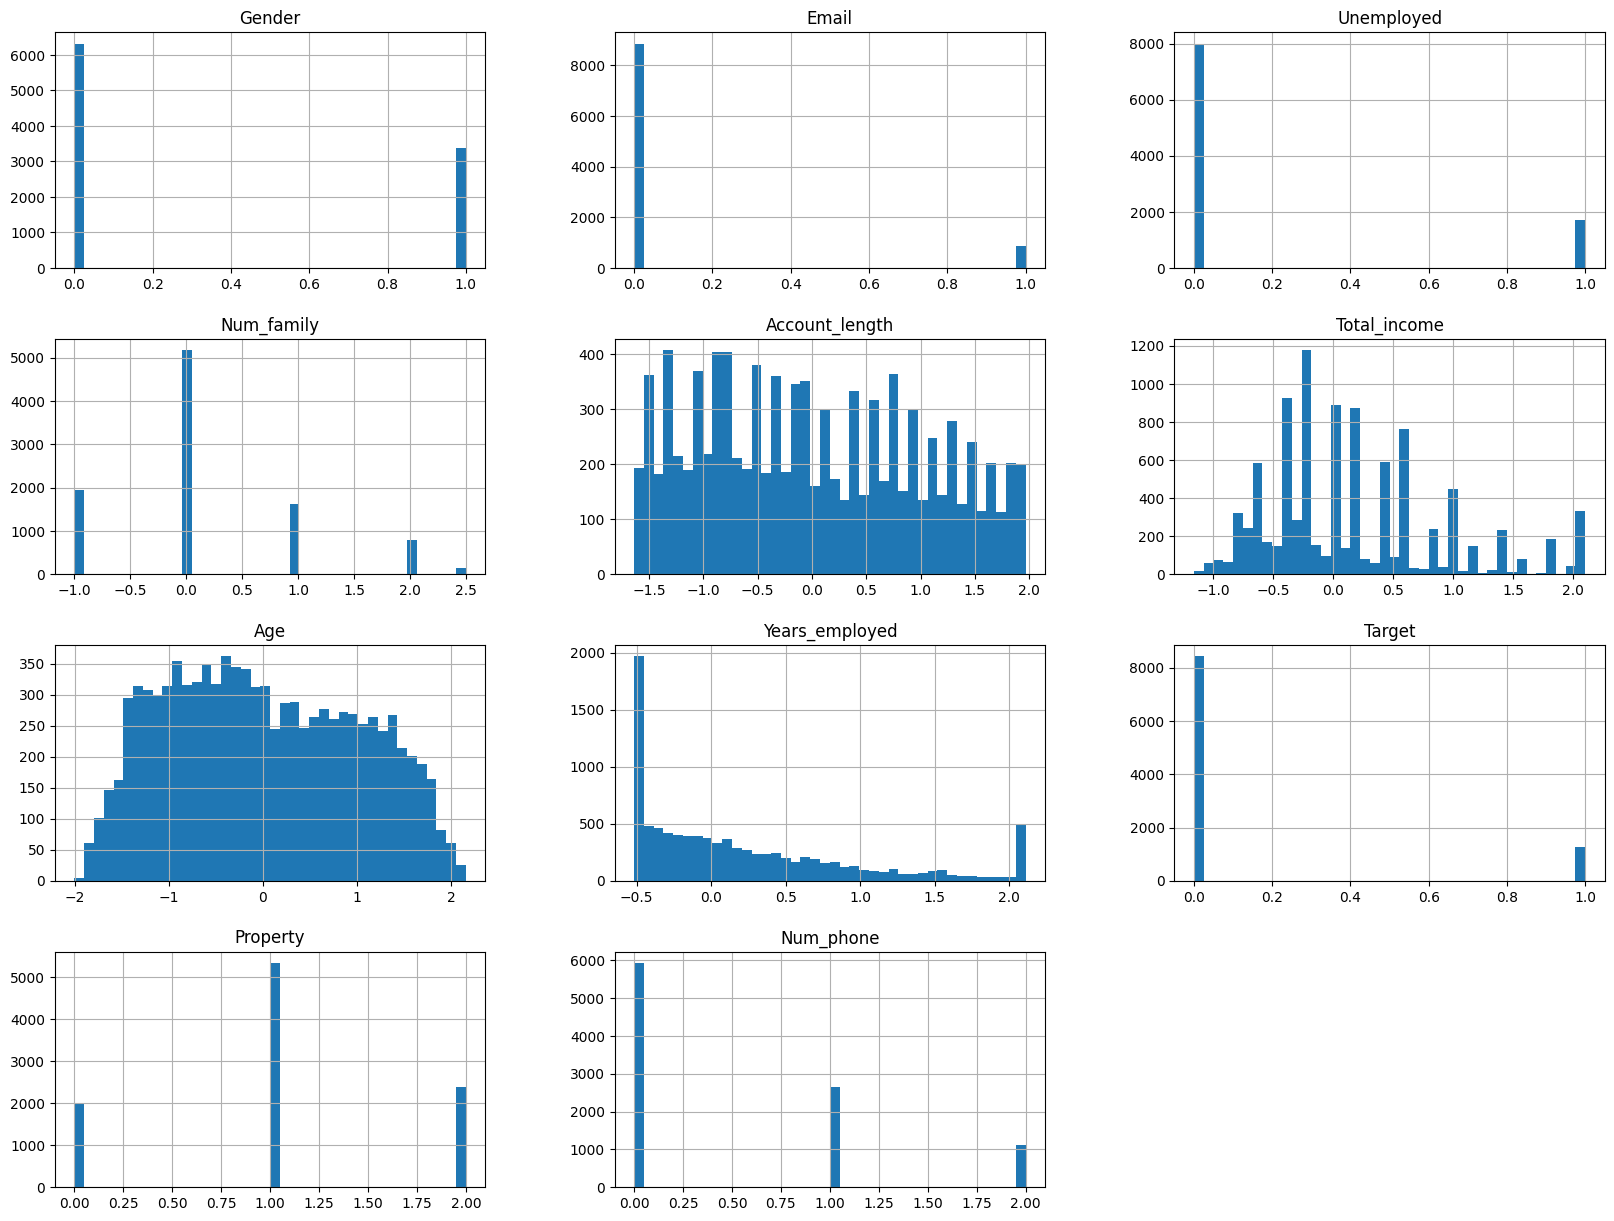

In [25]:
df.hist(bins=40, figsize=(20,15))

In [26]:
import plotly.express as px

def show_target_distribution_graph (data):
  target_count = data.groupby('Target', as_index = False).agg(total=('Target', 'count'))

  fig_target = px.pie(target_count, names='Target', values='total',
                      title='<b>Distribusi target pada data</b>', width=500, height=500)
  fig_target.show()

In [27]:
show_target_distribution_graph(df)

In [28]:
pip install --upgrade scikit-learn imbalanced-learn

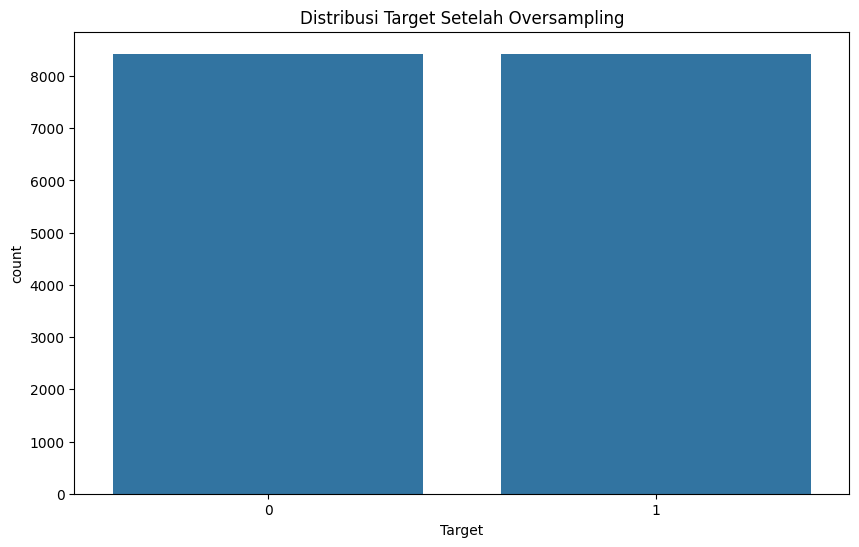

In [29]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Misalkan df adalah DataFrame yang sudah dimiliki
X = df.drop('Target', axis=1)
y = df['Target']

# Oversampling menggunakan RandomOverSampler
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Menggabungkan hasil oversampling ke dalam DataFrame baru
df= pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Target'])], axis=1)

# Fungsi untuk menampilkan distribusi target
def show_target_distribution_graph(df):
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.countplot(x='Target', data=df)
    plt.title('Distribusi Target Setelah Oversampling')
    plt.show()

# Menampilkan distribusi target setelah oversampling
show_target_distribution_graph(df)


# Encoding

In [30]:
cat_col= df.select_dtypes('object').columns.tolist()
df[cat_col].nunique()

,0
Income_type,5
Education_type,5
Family_status,5
Housing_type,6
Occupation_type,19


In [31]:
df.drop(columns=['Occupation_type'], axis=1, inplace=True)
df.head(2)

,Gender,Email,Unemployed,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Property,Num_phone,Target
0,1,0,0,0.0,-0.737064,2.1,-0.938956,1.192771,Working,Higher education,Civil marriage,Rented apartment,2,1,1
1,1,0,0,0.0,0.103918,-0.4,1.291140,-0.090361,Working,Secondary / secondary special,Married,House / apartment,2,0,0


**Drop kolom kategorikal yang memiliki values banyak**

In [32]:
cat_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(include='number').columns
cat_col

Index(['Income_type', 'Education_type', 'Family_status', 'Housing_type'], dtype='object')

### Kolom Income type

In [33]:
df["Income_type"].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

<Figure size 1500x1000 with 0 Axes>

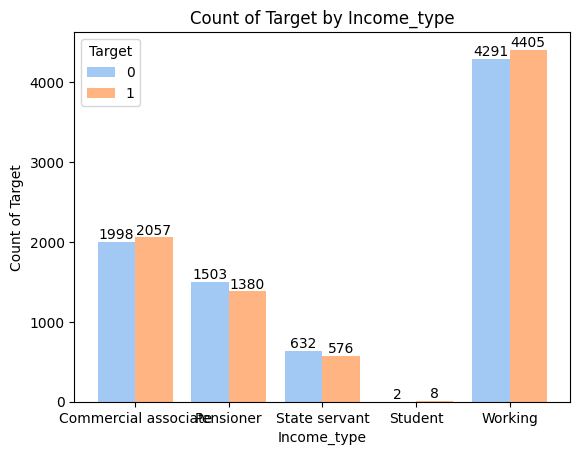

In [34]:
grouped = pd.crosstab(df['Income_type'], df['Target'])

plt.figure(figsize=(15, 10))

# Menentukan warna dari palet seaborn
colors = sns.color_palette('pastel')
ax = grouped.plot(kind='bar', color=colors, width=0.8)

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Income_type")
plt.ylabel("Count of Target")
plt.title("Count of Target by Income_type")
plt.xticks(rotation=0)
plt.legend(title='Target')
plt.show()

In [35]:
#df.query('Income_type == "Working" and Target == 1').count()#=606
#df.query('Income_type == "Commercial associate" and Target == 1').count()#=314
#df.query('Income_type == "Pensioner" and Target == 1').count()#=209
#df.query('Income_type == "State servant" and Target == 1').count()#=90
#df.query('Income_type == "Student" and Target == 1').count()#=1
df["Income_type"].replace({"Working":0,"Commercial associate":1,
                           'Pensioner':2, 'State servant':3, 'Student':4},inplace=True)
df["Income_type"].value_counts()

,count
Income_type,
0,8696
1,4055
2,2883
3,1208
4,10


### Kolom Education type

In [36]:
df["Education_type"].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

<Figure size 1000x2000 with 0 Axes>

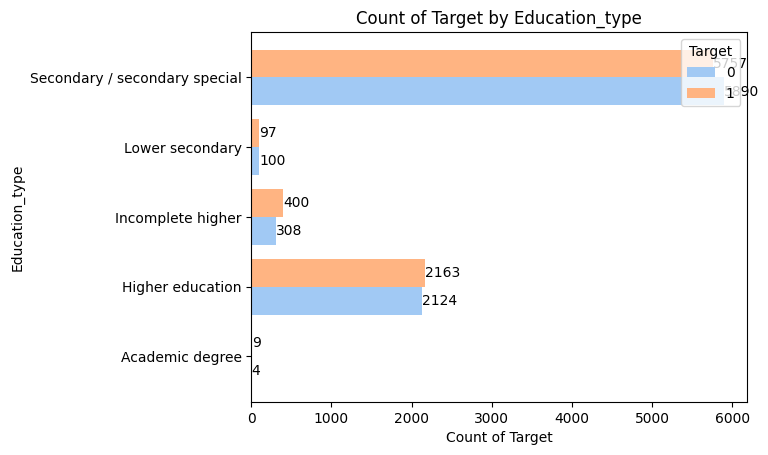

In [37]:
grouped = pd.crosstab(df['Education_type'], df['Target'])

plt.figure(figsize=(10, 20))

colors = sns.color_palette('pastel')
ax = grouped.plot(kind='barh', color=colors, width=0.8)

for container in ax.containers:
    ax.bar_label(container)

plt.ylabel("Education_type")
plt.xlabel("Count of Target")
plt.title("Count of Target by Education_type")
plt.legend(title='Target', loc='upper right')
plt.show()

**Tak perlu pake df query lah ini**

In [38]:
df["Education_type"].replace({"Secondary / secondary special":0,"Higher education":1,
                           'Incomplete higher':2, 'Lower secondary':3, 'Academic degree':4},inplace=True)
df["Education_type"].value_counts()

,count
Education_type,
0,11647
1,4287
2,708
3,197
4,13


### Kolom Family_status

In [39]:
df["Family_status"].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

<Figure size 1000x2000 with 0 Axes>

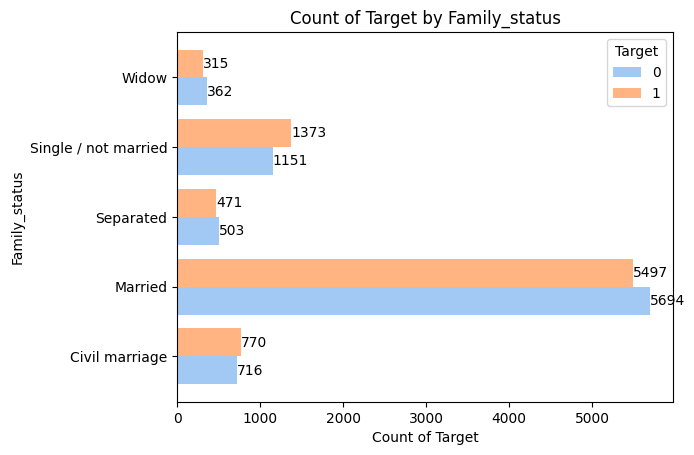

In [40]:
grouped = pd.crosstab(df['Family_status'], df['Target'])

plt.figure(figsize=(10, 20))

colors = sns.color_palette('pastel')
ax = grouped.plot(kind='barh', color=colors, width=0.8)

for container in ax.containers:
    ax.bar_label(container)

plt.ylabel("Family_status")
plt.xlabel("Count of Target")
plt.title("Count of Target by Family_status")
plt.legend(title='Target', loc='upper right')
plt.show()

In [41]:
df["Family_status"].replace({"Married":0,"Single / not married":1,
                           'Civil marriage':2, 'Separated':3, 'Widow':4},inplace=True)
df["Family_status"].value_counts()

,count
Family_status,
0,11191
1,2524
2,1486
3,974
4,677


### Kolom Housing_type

<Figure size 1000x2000 with 0 Axes>

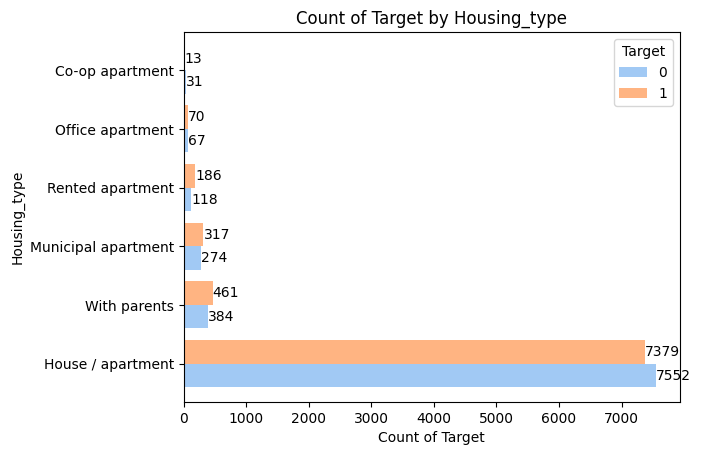

In [42]:
grouped = pd.crosstab(df['Housing_type'], df['Target'])
grouped = grouped.sort_values(by=1, ascending=False)

plt.figure(figsize=(10, 20))
colors = sns.color_palette('pastel')
ax = grouped.plot(kind='barh', color=colors, width=0.8)

for container in ax.containers:
    ax.bar_label(container)

plt.ylabel("Housing_type")
plt.xlabel("Count of Target")
plt.title("Count of Target by Housing_type")
plt.legend(title='Target', loc='upper right')
plt.show()

In [43]:
df["Housing_type"].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [44]:
df["Housing_type"].replace({"House / apartment":0,"With parents":1,
                           'Municipal apartment':2, 'Rented apartment':3,
                            'Office apartment':4, 'Co-op apartment':5},inplace=True)
df["Housing_type"].value_counts()

,count
Housing_type,
0,14931
1,845
2,591
3,304
4,137
5,44


# VIF Score
- untuk mengecek multikulinearisme
- Multiculinear : ketika model sama tingginya
- VIF Score klo g lebih dari 4 g perlu cek korelasi
- ketika cek korelasi antar atribut aja yg kolom terahir kan label
- yang berisiko dibandingkan dan diambil yang tinggi korelasinya dengan label

### Numerical Columns

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
num_col=['Num_family', 'Account_length',
         'Total_income', 'Age', 'Years_employed','Property',
       'Num_phone','Target']

X = add_constant(df[num_col])

vif_df = pd.DataFrame([vif(X.values, i)
                       for i in range (X.shape[1])],
                       index=X.columns).reset_index()

vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.loc[vif_df.feature != 'const']
vif_df

,feature,vif_score
1,Num_family,1.108612
2,Account_length,1.038469
3,Total_income,1.066579
4,Age,1.126273
5,Years_employed,1.041598
6,Property,1.065915
7,Num_phone,1.026184
8,Target,1.025968


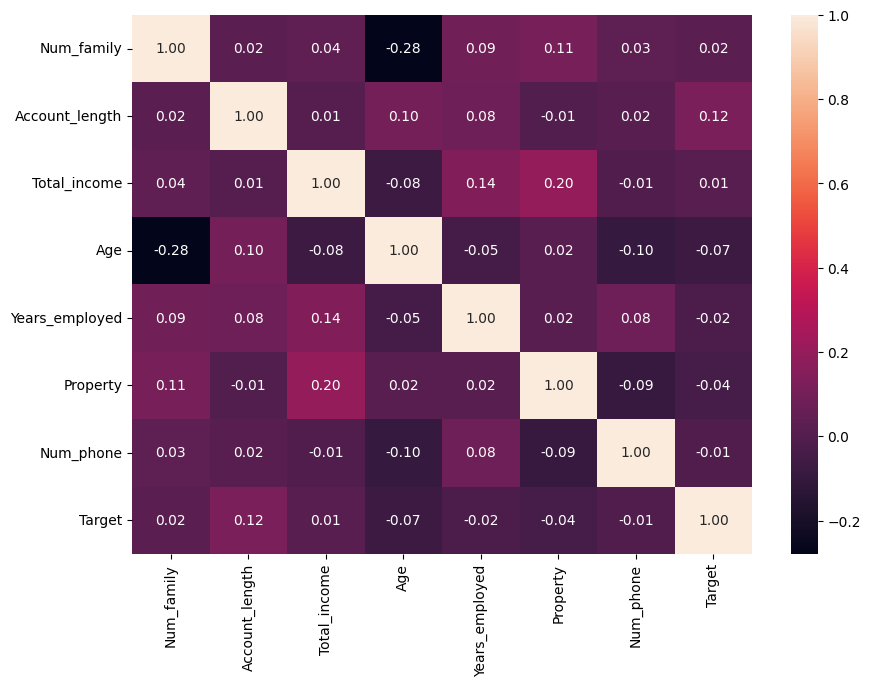

In [46]:
# heatmap correlation
corr = df[num_col].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

## Categorical Columns

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
import pandas as pd

cat_col = ['Gender', 'Email', 'Unemployed', 'Income_type',
           'Education_type', 'Family_status', 'Housing_type', 'Target']

X = add_constant(df[cat_col])

vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['vif_score'] = [vif(X.values, i) for i in range(X.shape[1])]

vif_df = vif_df.loc[vif_df['feature'] != 'const']
vif_df.reset_index(drop=True, inplace=True)

vif_df

,feature,vif_score
0,Gender,1.051687
1,Email,1.016000
2,Unemployed,1.498408
3,Income_type,1.452657
4,Education_type,1.023261
5,Family_status,1.033147
6,Housing_type,1.008581
7,Target,1.002881


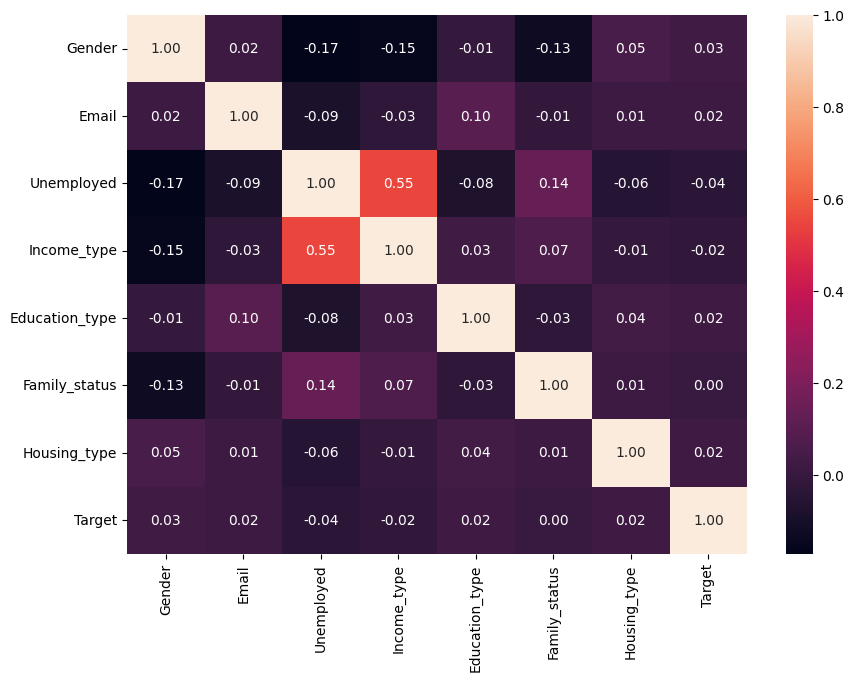

In [48]:
# heatmap correlation
corr = df[cat_col].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

# Modelling
- Split data train and test

In [49]:
x = df.drop('Target', axis=1)
y = df.Target
x.shape, y.shape

((16852, 14), (16852,))

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, stratify=y, random_state=0, test_size=0.3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11796, 14), (11796,), (5056, 14), (5056,))

### Klasifikasi Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred_rf = model.predict(x_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi: {accuracy*100:.2f}%")

precision = precision_score(y_test, y_pred_rf, average='weighted')
print(f"Presisi: {precision*100:.2f}%")

recall = recall_score(y_test, y_pred_rf, average='weighted')
print(f"Recall: {recall*100:.2f}%")

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\n Confusion Matrix:")
print(conf_matrix_rf)

Akurasi: 98.38%
Presisi: 98.39%
Recall: 98.38%

 Confusion Matrix:
[[2467   61]
 [  21 2507]]


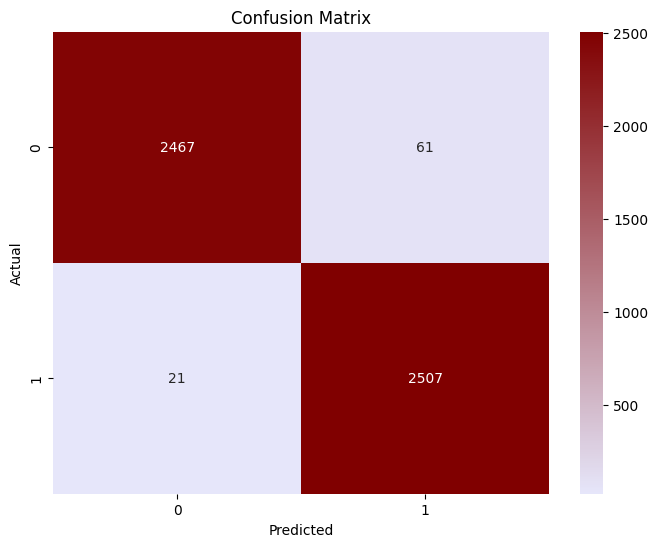

In [52]:
import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["lavender", "maroon"])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap=cmap)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Klasifikasi Logistic Regression
- sensitif kro imbalanced data

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(x_train, y_train)

# Memprediksi nilai target untuk test set
y_pred_lr= log_reg.predict(x_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Akurasi: {accuracy*100:.2f}%")

precision = precision_score(y_test, y_pred_lr, average='weighted')
print(f"Presisi: {precision*100:.2f}%")

recall = recall_score(y_test, y_pred_lr, average='weighted')
print(f"Recall: {recall*100:.2f}%")

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("\n Confusion Matrix:")
print(conf_matrix_lr)

Akurasi: 55.95%
Presisi: 55.95%
Recall: 55.95%

 Confusion Matrix:
[[1424 1104]
 [1123 1405]]


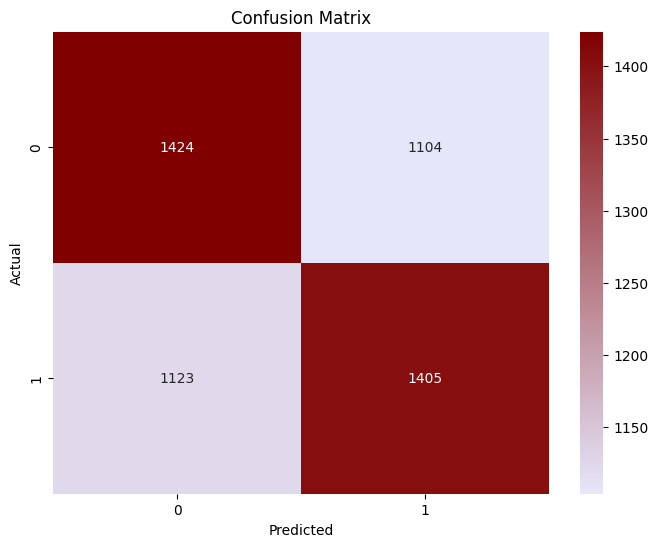

In [54]:
import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["lavender", "maroon"])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap=cmap)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)


accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Akurasi: {accuracy*100:.2f}%")


precision = precision_score(y_test, y_pred_knn, average='weighted')
print(f"Presisi: {precision*100:.2f}%")


recall = recall_score(y_test, y_pred_knn, average='weighted')
print(f"Recall: {recall*100:.2f}%")

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("\n Confusion Matrix:")
print(conf_matrix_knn)

Akurasi: 75.02%
Presisi: 77.56%
Recall: 75.02%

 Confusion Matrix:
[[1513 1015]
 [ 248 2280]]


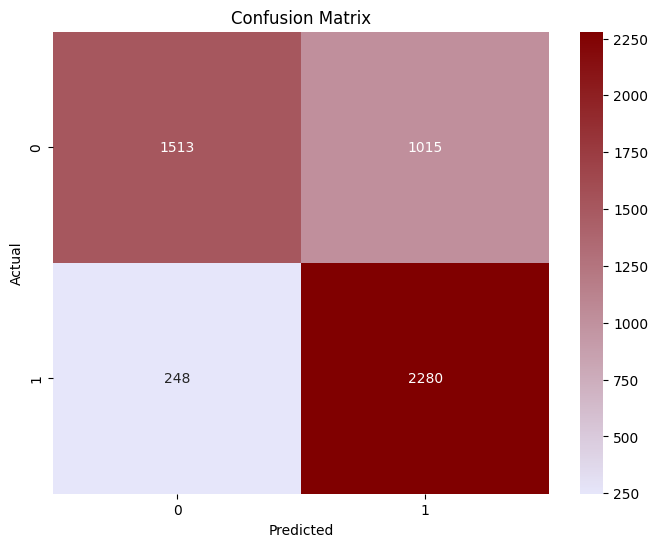

In [56]:
import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["lavender", "maroon"])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap=cmap)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()